In [1]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
database_path = "/content/drive/My Drive/DBs/PCA/"

In [3]:
database = pd.read_csv(database_path + "Social_Network_Ads.csv")

In [4]:
dummy_db = pd.get_dummies(database['Gender'])
database = pd.concat([database, dummy_db], axis = 1)

In [5]:
database = database.drop(["User ID","Gender","Female"], axis = 1)
database.head(4)

,Age,EstimatedSalary,Purchased,Male
0,19.0,19000.0,0,1
1,35.0,20000.0,0,1
2,26.0,43000.0,0,0
3,27.0,57000.0,0,0


In [6]:
database = database.apply(zscore)

In [7]:
database.shape

(400, 4)

In [8]:
'''for i in range(1, 15):
    kpca = KernelPCA(n_components = i, kernel = 'rbf')
    tranformed = kpca.fit_transform(database)
    explained_variance = np.var(tranformed, axis = 0)
    #print(explained_variance)
    print(np.sum(explained_variance))
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    #print(explained_variance_ratio)
    #print(np.cumsum(explained_variance_ratio))'''

"for i in range(1, 15):\n    kpca = KernelPCA(n_components = i, kernel = 'rbf')\n    tranformed = kpca.fit_transform(database)\n    explained_variance = np.var(tranformed, axis = 0)\n    #print(explained_variance)\n    print(np.sum(explained_variance))\n    explained_variance_ratio = explained_variance / np.sum(explained_variance)\n    #print(explained_variance_ratio)\n    #print(np.cumsum(explained_variance_ratio))"

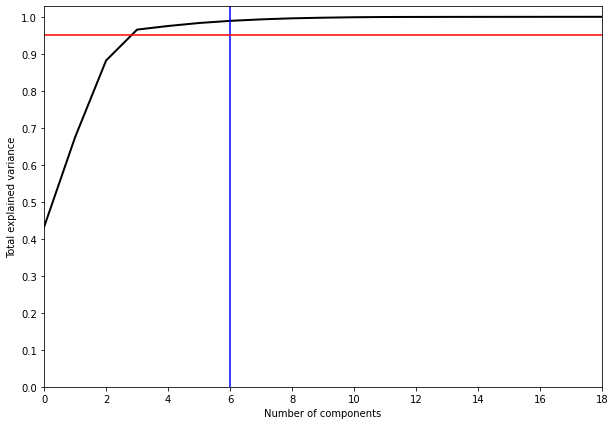

In [9]:
plt.figure(figsize=(10,7))
kpca = KernelPCA(kernel='rbf', gamma=0.01)
tranformed = kpca.fit_transform(database)
explained_variance = np.var(tranformed, axis = 0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.plot(np.cumsum(explained_variance_ratio), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 18)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(6, c='b')
plt.axhline(0.95, c='r')

plt.show()